In [155]:
import os
from keras import Input
#os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

In [156]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [157]:
def f(x):
    return 2*np.sin(x)

In [159]:
x_train=np.linspace(0, 2*np.pi, 20).reshape(-1, 1)
y_train=f(x_train)

step=(2*np.pi) / 20

x_test=(x_train.flatten() + step/2)
x_test=x_test.reshape(-1, 1)
y_test=f(x_test)

In [160]:
def create_model(f_n_size):
    d_model=Sequential()
    d_model.add(Input(shape=(1,)))
    d_model.add(Dense(f_n_size, activation='tanh'))
    d_model.add(Dense(f_n_size, activation='tanh'))
    d_model.add(Dense(1))
    d_model.compile(optimizer='adam', loss='mse')
    return d_model

In [161]:
final_loss=1.0
n_size=1
all_mse=[]
all_sizes=[]
c_model=create_model(n_size)

while final_loss > 0.01:
    c_model=create_model(n_size)

    history=c_model.fit(x_train, y_train, epochs=500, verbose=0)
    final_loss = history.history['loss'][-1]

    print(f"Size: {n_size} MSE: {final_loss:.4f}")
    all_mse.append(final_loss)
    all_sizes.append(n_size)

    n_size+=10

Size: 1 MSE: 1.2040
Size: 11 MSE: 0.3679
Size: 21 MSE: 0.3741
Size: 31 MSE: 0.2604
Size: 41 MSE: 0.0417
Size: 51 MSE: 0.0019


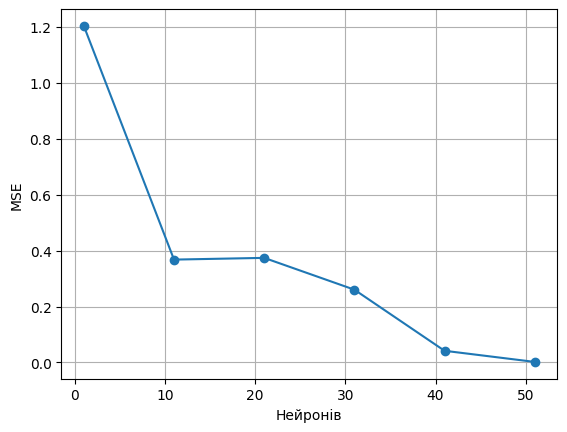

In [162]:
plt.plot(all_sizes, all_mse, marker='o')
plt.xlabel("Нейронів")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

In [163]:
y_pred_train=c_model.predict(x_train)
y_pred_test=c_model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


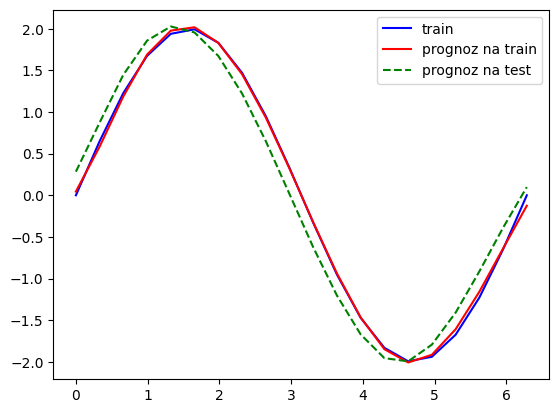

In [164]:
plt.plot(x_train, y_train, 'b', label='train')
plt.plot(x_train, y_pred_train, 'r-', label='prognoz na train')
plt.plot(x_train, y_pred_test, 'g--', label='prognoz na test')
plt.legend()
plt.show()

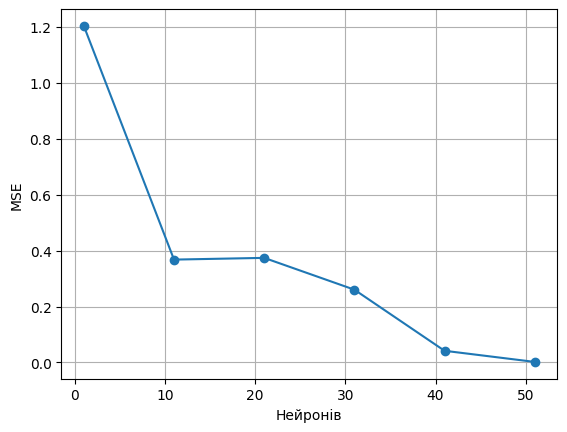

In [166]:
plt.plot(all_sizes, all_mse, marker='o')
plt.xlabel("Нейронів")
plt.ylabel("MSE")
plt.grid(True)
plt.show()

Навчальна вибірка

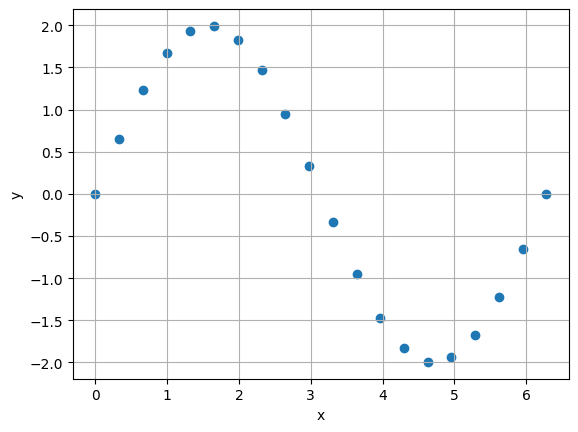

In [171]:
plt.scatter(x_train, y_train)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

Тестова вибірка

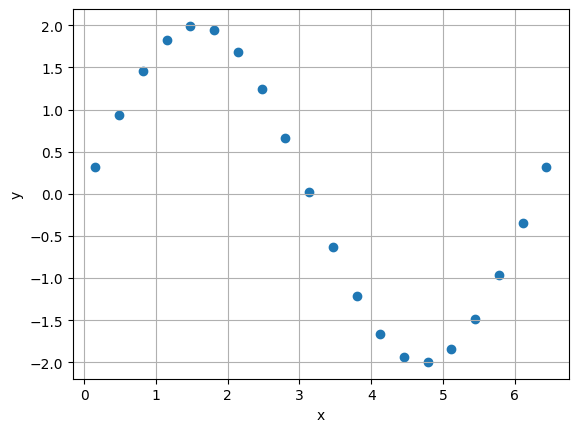

In [170]:
plt.scatter(x_test, y_test)
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()